#Importando as bibliotecas e o data set


In [49]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/supermarket_sales - Sheet1.csv')

In [23]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [74]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Total_sale,Month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,307.58738,1.993000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858,234.17651,0.835254
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,10.17000,1.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,118.49750,1.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,241.76000,2.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,448.90500,3.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,993.00000,3.000000


#Checando os tipos dos dados e a ocorrência de valores nulos

In [16]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [18]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [25]:
df.shape

(1000, 17)

#Análises 

#Qual cidade vendeu mais?

Gerar uma nova coluna. Com o preço unitário multiplicado pela quantidade

In [32]:
df['Total_sale'] = df['Unit price'] * df['Quantity'] 

In [33]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total_sale
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,76.40


Agora vamos calcular qual cidade vendeu mais, partindo da nova coluna.

In [53]:
df.groupby(df['City'])['Total_sale'].sum()

City
Mandalay     101140.64
Naypyitaw    105303.53
Yangon       101143.21
Name: Total_sale, dtype: float64

In [51]:
sales_for_city =df.groupby(df['City'])['Total_sale'].sum()

In [45]:
 sales_city = dict(df.groupby(df['City'])['Total_sale'].sum())
 city = list(sales_city.keys())

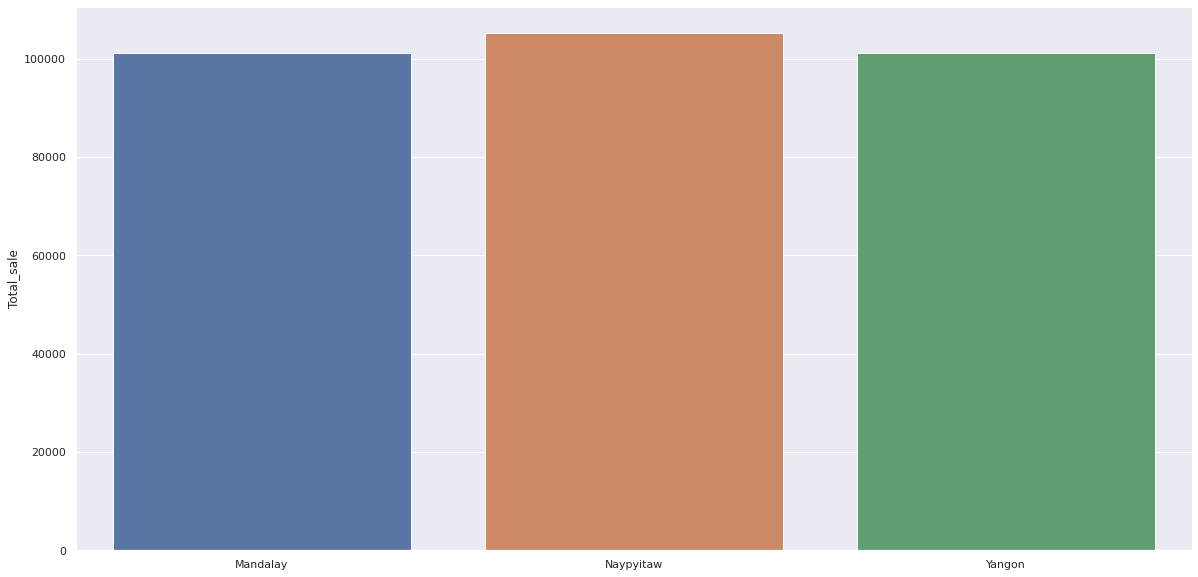

In [52]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x=city , y = sales_for_city , data=df);

Podemos concluir que Naypyitaw é a cidade que teve o maior valor de vendas.

#Em qual mês as vendas foram maiores?

Nesse caso deveremos modificar o tipo da coluna da data e depois criar uma nova coluna extraindo o mês. 

In [54]:
df['Date'] = pd.to_datetime(df['Date'])

In [55]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Total_sale                        float64
dtype: object

In [56]:
df.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total_sale
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83


Agora vamos criar uma nova coluna do mês

In [57]:
import datetime as dt

In [58]:
df['Month'] = df['Date'].dt.month 

In [63]:
df.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total_sale,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83,1


Agora basta usar novamente o groupby junto com a função de soma para a coluna Total_sales

In [61]:
df.groupby(df['Month'])['Total_sale'].sum()

Month
1    110754.16
2     92589.88
3    104243.34
Name: Total_sale, dtype: float64

Podemos notar que o dataframe possui dados apenas dos 3 primeiros meses de 2019 e que o mês com maior vendas foi Janeiro.


#Qual a linha de  produtos mais comprado pelo público feminino?

In [75]:
#A lógica é agrupar o df apenas do genero feminino
#Pela linha de produtos
#E contar o Total Sale

df[df['Gender']=='Female'].groupby(df['Product line'])['Total_sale'].count() 

Product line
Electronic accessories    84
Fashion accessories       96
Food and beverages        90
Health and beauty         64
Home and lifestyle        79
Sports and travel         88
Name: Total_sale, dtype: int64

Mas lembre-se, que nesse caso estamos estabelecando que o tipo Fashion accessories vendeu mais, utilizando uma medida criada com a multiplicação do valor unitário pelo número de items vendidos. Assim a contagem ocorre de forma apenas unitária, para cada linha que o tipo aparece.


Então vamos fazer essa análise utilizando apenas a quantidade de items vendidos
E dessa forma vamos obter o tipo de item mais vendido de verdade, com a quantidade total. Dessa vez deveremos somar.

In [76]:
df[df['Gender']=='Female'].groupby(df['Product line'])['Quantity'].sum() 

Product line
Electronic accessories    488
Fashion accessories       530
Food and beverages        514
Health and beauty         343
Home and lifestyle        498
Sports and travel         496
Name: Quantity, dtype: int64

Para facilitar, vamos colocar as informações em gráfico.

In [82]:
linha_vendida = df[df['Gender']=='Female'].groupby(df['Product line'])['Quantity'].sum() 

In [83]:
tipo_prod = dict(df[df['Gender']=='Female'].groupby(df['Product line'])['Quantity'].sum())

In [85]:
product_line = list(tipo_prod.keys())

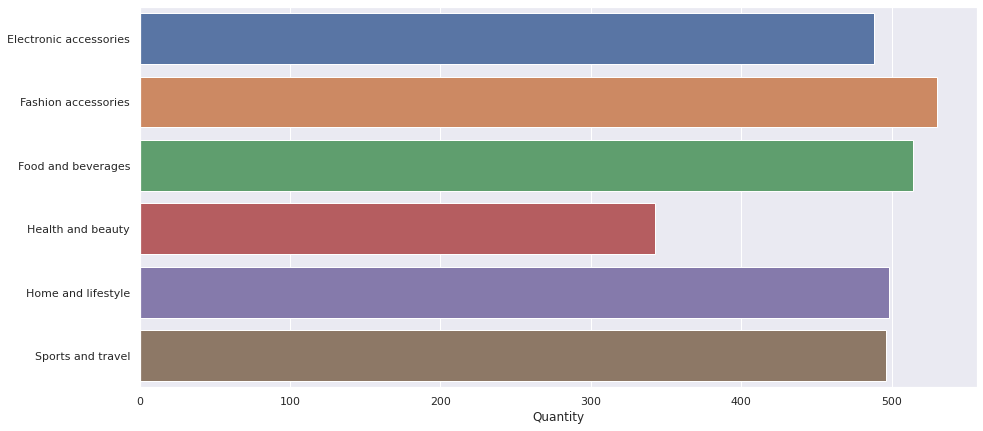

In [102]:
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.barplot(y=product_line,  x =linha_vendida,  data=df)

In [ ]:
E constatamos que Fashion accessories foi a linha de produtos mais vendidas ao público feminino.

#Qual hórario aparece como o pico de vendas 

Deveremos transformar a coluna Time, que está em string para uma do tipo datetime.
E depois criar uma nova coluna extraindo apenas as horas e excluindo os minutos.
Para essa análise levaremos em consideração apenas as horas. 

In [106]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Total_sale                        float64
Month                               int64
dtype: object

In [120]:
df['Hour'] = df.Time.dt.hour

In [137]:
df.to_csv('sales_alanysis(tratado).csv')

In [139]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total_sale,Month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,76.40,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.31,3,13


In [142]:
keys = [hora for hora, dn in df.groupby(['Hour'])]


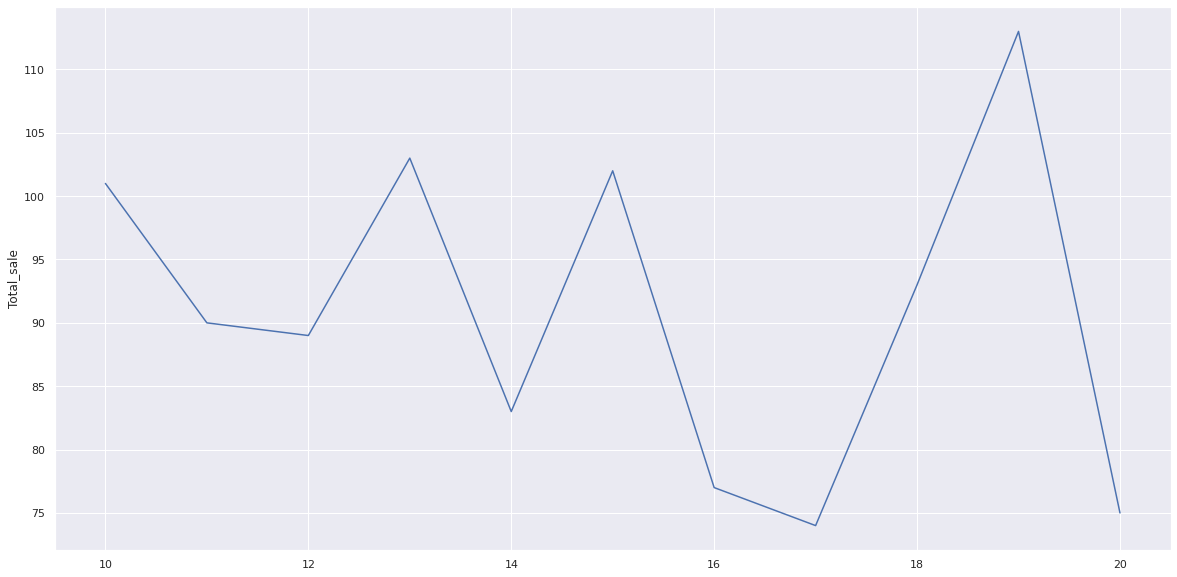

In [146]:
#Note que aqui é importante usar o count e não o sum
#pois a intenção é contar o número de vendas ocorridas naquele horário
vendas_horas = df.groupby(['Hour']).count()['Total_sale']
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.lineplot(x = keys , y= vendas_horas)

E podemos notar um pico no horário entre 18 e 20 horas.

#Tipo de pagamento mais utilizado para comprar os produtos do tipo Fashion accessories, na cidade de Naypyitaw

In [155]:

df[(df['Product line']=='Fashion accessories') & (df['City']=='Naypyitaw')].groupby(df['Payment'])['Payment'].count()

Payment
Cash           22
Credit card    20
Ewallet        23
Name: Payment, dtype: int64